In [1]:
import pandas as pd

In [2]:
# 그래프에서 한글을 표시하기 위해 한글 폰트 필요
# 아래는 리눅스용이므로 위도우에서 사용할 경우 안될 수 있습니다. 그러면 윈도우에서의 설정 방법을 찾아서 해야 합니다.
# apt-get install -y fonts-nanum
# https://dasom.net/108

import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)
plt.rcParams["font.family"] = "NanumGothic"

Duplicate key in file PosixPath('/opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family: NanumGothic')


Text(0.3, 0.3, '한글')

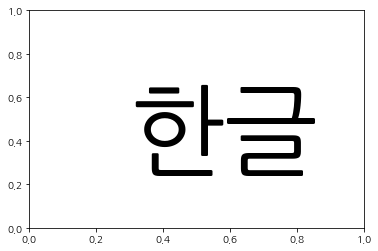

In [3]:
# plt.text(0.3, 0.3, '한글', size=100)

In [3]:
# 강원도
data_file_1 = "annot_csvs/1_gw.csv"
annot_df_1 = pd.read_csv(data_file_1)
data_file_2 = "annot_csvs/2_gw.csv"
annot_df_2 = pd.read_csv(data_file_2)
data_file_3 = "annot_csvs/3_gw.csv"
annot_df_3 = pd.read_csv(data_file_3)

In [5]:
# annot_df.dtypes
# annot_df.info
annot_df_1.describe()
# annot_df.describe

,birth_year,sentence_id
count,86271.00000,86271.000000
mean,1958.18501,1.008554
std,6.94320,0.110096
min,1934.00000,1.000000
25%,1954.00000,1.000000
50%,1958.00000,1.000000
75%,1963.00000,1.000000
max,1973.00000,4.000000


In [8]:
annot_df_2.describe()

,birth_year,sentence_id
count,149101.000000,149101.000000
mean,1956.254559,2.434444
std,7.997446,1.568880
min,1934.000000,1.000000
25%,1951.000000,1.000000
50%,1957.000000,2.000000
75%,1962.000000,3.000000
max,1973.000000,23.000000


In [7]:
annot_df_3.describe()

,birth_year,sentence_id
count,68487.000000,68487.000000
mean,1956.927738,8.122169
std,7.755365,6.107065
min,1935.000000,1.000000
25%,1952.000000,3.000000
50%,1958.000000,7.000000
75%,1962.000000,11.000000
max,1973.000000,53.000000


In [4]:
gw_annot_df = pd.concat([annot_df_1, annot_df_2, annot_df_3])

In [11]:
gw_annot_df.describe()

,birth_year,sentence_id
count,303859.000000,303859.000000
mean,1956.954377,3.311569
std,7.700499,4.088608
min,1934.000000,1.000000
25%,1952.000000,1.000000
50%,1958.000000,2.000000
75%,1962.000000,4.000000
max,1973.000000,53.000000


In [6]:
speaker_df = gw_annot_df[["speaker_id", "residence_province", "gender", "birth_year"]].drop_duplicates()


In [7]:
speaker_df.to_csv("annot_csvs/gw_speaker.csv")

In [26]:
gw_speaker_df["gender"].value_counts()

f    1676
m     639
Name: gender, dtype: int64

<AxesSubplot:title={'center':'강원 화자 성별'}>

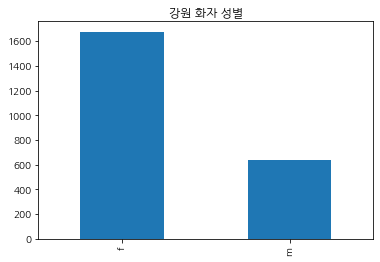

In [27]:
gw_speaker_df["gender"].value_counts().plot(kind="bar", title="강원 화자 성별")

In [19]:
# gw_annot_df.nunique().speaker_id
gw_annot_df.nunique()   

json_file_name        142374
utterance_type             3
speaker_id              2268
residence_province         1
gender                     2
birth_year                40
sentence_id               53
intent_type                8
intent_category            9
emotion_type               5
grammar_type               6
dtype: int64

In [16]:
gw_annot_df.to_csv("annot_csvs/gw_total.csv")

In [17]:
import os
os.getcwd()

'/workspace/speechbrain/recipes/KdialectSpeech/Analyze'

In [12]:
# 연령대
# 30대 : 1982 ~ 1991
# 40대 : 1972 ~ 1981
# 50대 : 1962 ~ 1971
# 60대 : 1952 ~ 1961
# 70대 : 1942 ~ 1951
# 80대 : 1932 ~ 1941
# 90대 이상 :  ~ 1931
### 90대 : 1922 ~ 1931

gw_annot_30_df = gw_annot_df[(1982 <= gw_annot_df["birth_year"]) & (gw_annot_df["birth_year"] <= 1991)]
gw_annot_40_df = gw_annot_df[(1972 <= gw_annot_df["birth_year"]) & (gw_annot_df["birth_year"] <= 1981)]
gw_annot_50_df = gw_annot_df[(1962 <= gw_annot_df["birth_year"]) & (gw_annot_df["birth_year"] <= 1971)]
gw_annot_60_df = gw_annot_df[(1952 <= gw_annot_df["birth_year"]) & (gw_annot_df["birth_year"] <= 1961)]
gw_annot_70_df = gw_annot_df[(1942 <= gw_annot_df["birth_year"]) & (gw_annot_df["birth_year"] <= 1951)]
gw_annot_80_df = gw_annot_df[(1932 <= gw_annot_df["birth_year"]) & (gw_annot_df["birth_year"] <= 1941)]
gw_annot_90_df = gw_annot_df[(gw_annot_df["birth_year"] <= 1931)]
# annot_90_df = gw_annot_df[(1922 <= gw_annot_df["birth_year"]) & (gw_annot_df["birth_year"] <= 1931)]

# ages = ["30", "40", "50", "60", "70", "80", "90"]
# tag_type = ["intent", "category", "emotion", "grammar"]

In [13]:
gw_annot_50_df

,json_file_name,utterance_type,speaker_id,residence_province,gender,birth_year,sentence_id,intent_type,intent_category,emotion_type,grammar_type
2,st_set1_collectorgw94_speakergw1599_11_7,st,speakergw1599,gw,f,1962.0,1.0,EXP,no_value,positive,DEC
6,st_set1_collectorgw95_speakergw1004_68_18,st,speakergw1004,gw,f,1971.0,1.0,REP,no_value,irrelevant,DEC
9,st_set3_collectorgw103_speakergw527_49_8,st,speakergw527,gw,f,1966.0,1.0,INT,no_value,irrelevant,YNI
10,st_set3_collectorgw166_speakergw700_79_5,st,speakergw700,gw,f,1969.0,1.0,INT,no_value,irrelevant,WHI
11,st_set2_collectorgw103_speakergw3102_1_9,st,speakergw3102,gw,f,1962.0,1.0,EXP,no_value,negative,DEC
...,...,...,...,...,...,...,...,...,...,...,...
68469,talk_set2_collectorgw87_speakergw1332_speakerg...,talk,speakergw1332,gw,m,1962.0,3.0,REP,no_value,positive,DEC
68470,talk_set2_collectorgw87_speakergw1332_speakerg...,talk,speakergw1333,gw,f,1964.0,4.0,REP,no_value,positive,DEC
68471,talk_set2_collectorgw87_speakergw1332_speakerg...,talk,speakergw1333,gw,f,1964.0,5.0,REP,no_value,positive,DEC
68472,talk_set2_collectorgw87_speakergw1332_speakerg...,talk,speakergw1333,gw,f,1964.0,6.0,REP,no_value,irrelevant,DEC


In [22]:
# 30대
stat_30_intent_df = pd.DataFrame()
stat_30_intent_df["intent_m"] = (annot_30_df[annot_30_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_30_intent_df["intent_f"] = (annot_30_df[annot_30_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_30_category_df = pd.DataFrame()
stat_30_category_df["category_m"] = (annot_30_df[annot_30_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_30_category_df["category_f"] = (annot_30_df[annot_30_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_30_emotion_df = pd.DataFrame()
stat_30_emotion_df["emotion_m"] = (annot_30_df[annot_30_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_30_emotion_df["emotion_f"] = (annot_30_df[annot_30_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_30_grammar_df = pd.DataFrame()
stat_30_grammar_df["grammar_m"] = (annot_30_df[annot_30_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_30_grammar_df["grammar_f"] = (annot_30_df[annot_30_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# 40대
stat_40_intent_df = pd.DataFrame()
stat_40_intent_df["intent_m"] = (annot_40_df[annot_40_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_40_intent_df["intent_f"] = (annot_40_df[annot_40_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_40_category_df = pd.DataFrame()
stat_40_category_df["category_m"] = (annot_40_df[annot_40_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_40_category_df["category_f"] = (annot_40_df[annot_40_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_40_emotion_df = pd.DataFrame()
stat_40_emotion_df["emotion_m"] = (annot_40_df[annot_40_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_40_emotion_df["emotion_f"] = (annot_40_df[annot_40_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_40_grammar_df = pd.DataFrame()
stat_40_grammar_df["grammar_m"] = (annot_40_df[annot_40_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_40_grammar_df["grammar_f"] = (annot_40_df[annot_40_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# 50대
stat_50_intent_df = pd.DataFrame()
stat_50_intent_df["intent_m"] = (annot_50_df[annot_50_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_50_intent_df["intent_f"] = (annot_50_df[annot_50_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_50_category_df = pd.DataFrame()
stat_50_category_df["category_m"] = (annot_50_df[annot_50_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_50_category_df["category_f"] = (annot_50_df[annot_50_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_50_emotion_df = pd.DataFrame()
stat_50_emotion_df["emotion_m"] = (annot_50_df[annot_50_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_50_emotion_df["emotion_f"] = (annot_50_df[annot_50_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_50_grammar_df = pd.DataFrame()
stat_50_grammar_df["grammar_m"] = (annot_50_df[annot_50_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_50_grammar_df["grammar_f"] = (annot_50_df[annot_50_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# 60대
stat_60_intent_df = pd.DataFrame()
stat_60_intent_df["intent_m"] = (annot_60_df[annot_60_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_60_intent_df["intent_f"] = (annot_60_df[annot_60_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_60_category_df = pd.DataFrame()
stat_60_category_df["category_m"] = (annot_60_df[annot_60_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_60_category_df["category_f"] = (annot_60_df[annot_60_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_60_emotion_df = pd.DataFrame()
stat_60_emotion_df["emotion_m"] = (annot_60_df[annot_60_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_60_emotion_df["emotion_f"] = (annot_60_df[annot_60_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_60_grammar_df = pd.DataFrame()
stat_60_grammar_df["grammar_m"] = (annot_60_df[annot_60_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_60_grammar_df["grammar_f"] = (annot_60_df[annot_60_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# 70대
stat_70_intent_df = pd.DataFrame()
stat_70_intent_df["intent_m"] = (annot_70_df[annot_70_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_70_intent_df["intent_f"] = (annot_70_df[annot_70_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_70_category_df = pd.DataFrame()
stat_70_category_df["category_m"] = (annot_70_df[annot_70_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_70_category_df["category_f"] = (annot_70_df[annot_70_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_70_emotion_df = pd.DataFrame()
stat_70_emotion_df["emotion_m"] = (annot_70_df[annot_70_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_70_emotion_df["emotion_f"] = (annot_70_df[annot_70_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_70_grammar_df = pd.DataFrame()
stat_70_grammar_df["grammar_m"] = (annot_70_df[annot_70_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_70_grammar_df["grammar_f"] = (annot_70_df[annot_70_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# 80대
stat_80_intent_df = pd.DataFrame()
stat_80_intent_df["intent_m"] = (annot_80_df[annot_80_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_80_intent_df["intent_f"] = (annot_80_df[annot_80_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_80_category_df = pd.DataFrame()
stat_80_category_df["category_m"] = (annot_80_df[annot_80_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_80_category_df["category_f"] = (annot_80_df[annot_80_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_80_emotion_df = pd.DataFrame()
stat_80_emotion_df["emotion_m"] = (annot_80_df[annot_80_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_80_emotion_df["emotion_f"] = (annot_80_df[annot_80_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_80_grammar_df = pd.DataFrame()
stat_80_grammar_df["grammar_m"] = (annot_80_df[annot_80_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_80_grammar_df["grammar_f"] = (annot_80_df[annot_80_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# 90대
stat_90_intent_df = pd.DataFrame()
stat_90_intent_df["intent_m"] = (annot_90_df[annot_90_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_90_intent_df["intent_f"] = (annot_90_df[annot_90_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_90_category_df = pd.DataFrame()
stat_90_category_df["category_m"] = (annot_90_df[annot_90_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_90_category_df["category_f"] = (annot_90_df[annot_90_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_90_emotion_df = pd.DataFrame()
stat_90_emotion_df["emotion_m"] = (annot_90_df[annot_90_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_90_emotion_df["emotion_f"] = (annot_90_df[annot_90_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_90_grammar_df = pd.DataFrame()
stat_90_grammar_df["grammar_m"] = (annot_90_df[annot_90_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_90_grammar_df["grammar_f"] = (annot_90_df[annot_90_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

In [26]:
# print(f"   < stat_30_intent > \n {stat_30_intent_df}")
# print(f"   < stat_40_intent > \n {stat_40_intent_df}")
# print(f"   < stat_50_intent > \n {stat_50_intent_df}")
# print(f"   < stat_60_intent > \n {stat_60_intent_df}")
# print(f"   < stat_70_intent > \n {stat_70_intent_df}")
# print(f"   < stat_80_intent > \n {stat_80_intent_df}")
# print(f"   < stat_90_intent > \n {stat_90_intent_df}")
stat_30_intent_df

,intent_m,intent_f
DES,NaN,166
EXP,NaN,41
INT,NaN,2
PRO,NaN,1
REP,NaN,119


In [27]:
stat_40_intent_df

,intent_m,intent_f
DES,2463,6004
DIR,20,41
ETC,83,169
EXP,685,1548
INT,293,612
PRO,38,80
REP,4096,9884
no_intents,10,5


In [28]:
stat_50_intent_df

,intent_m,intent_f
DES,15089,50831
DIR,106,282
ETC,376,1314
EXP,3396,16034
INT,1327,3826
PRO,176,585
REP,21429,66793
no_intents,43,136


In [29]:
stat_60_intent_df

,intent_m,intent_f
DES,40656,134135
DIR,180,575
ETC,385,1675
EXP,9647,36165
INT,1905,5355
PRO,300,806
REP,47422,136467
no_intents,59,419


In [30]:
stat_70_intent_df

,intent_m,intent_f
DES,36460,110381
DIR,185,494
ETC,259,1076
EXP,7206,26742
INT,1235,3837
PRO,166,493
REP,36036,101245
no_intents,3,170


In [31]:
stat_80_intent_df

,intent_m,intent_f
DES,8519,18839.0
DIR,46,100.0
ETC,87,245.0
EXP,1661,4448.0
INT,346,683.0
PRO,41,75.0
REP,8618,16384.0
no_intents,17,NaN


In [32]:
stat_90_intent_df

,intent_m,intent_f
DES,201,484
ETC,2,3
EXP,44,98
INT,8,22
REP,202,392


<AxesSubplot:title={'center':'90대 intent'}>

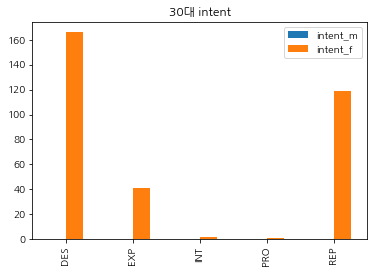

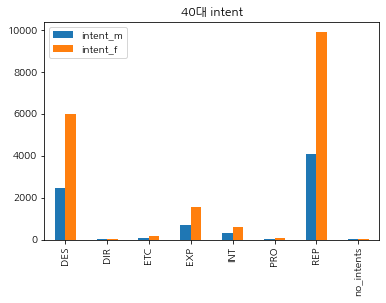

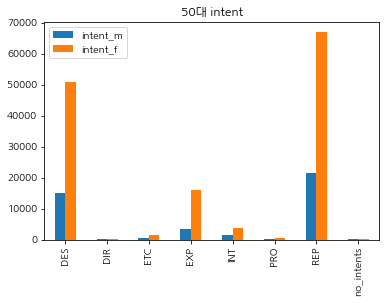

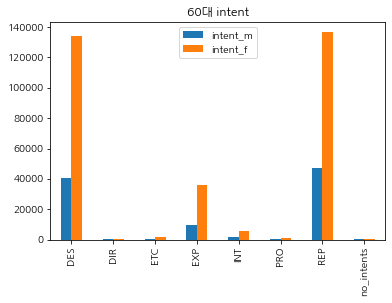

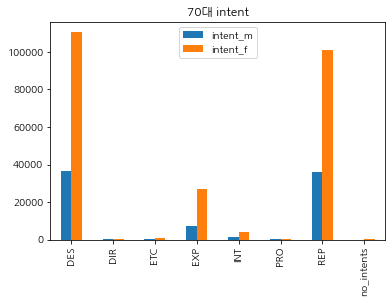

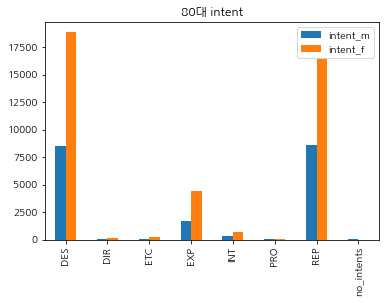

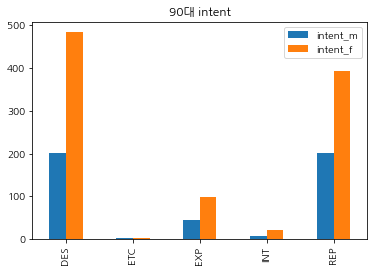

In [34]:
stat_30_intent_df.plot(kind="bar", title="30대 intent")
stat_40_intent_df.plot(kind="bar", title="40대 intent")
stat_50_intent_df.plot(kind="bar", title="50대 intent")
stat_60_intent_df.plot(kind="bar", title="60대 intent")
stat_70_intent_df.plot(kind="bar", title="70대 intent")
stat_80_intent_df.plot(kind="bar", title="80대 intent")
stat_90_intent_df.plot(kind="bar", title="90대 intent")


In [35]:
stat_30_category_df

,category_m,category_f
WH질문,NaN,1
객관적경험,NaN,43
걱정,NaN,1
놀람,NaN,1
느낌,NaN,13
동의,NaN,2
못마땅함,NaN,3
묘사,NaN,3
부탁,NaN,1
불만,NaN,2


In [36]:
stat_40_category_df

,category_m,category_f
WH질문,78,241.0
Y/N질문,79,166.0
no_intents,10,5.0
no_value,689,NaN
가능,6,9.0
감탄,10,16.0
객관적경험,459,1300.0
걱정,57,78.0
고마움,14,21.0
공감,17,27.0


In [12]:
stat_50_category_df

,category_m,category_f
WH질문,484,1345
Y/N질문,377,1042
no_intents,43,136
no_value,672,390
가능,31,91
감탄,47,181
객관적경험,3575,11861
걱정,113,632
고마움,48,163
공감,72,331


In [37]:
stat_60_category_df

,category_m,category_f
WH질문,592,1874
Y/N질문,459,1355
no_intents,59,419
no_value,3,21
가능,79,203
감탄,127,416
객관적경험,10594,33189
걱정,292,1230
고마움,128,513
공감,105,384


In [38]:
stat_70_category_df

,category_m,category_f
WH질문,411,1331
Y/N질문,304,888
no_intents,3,170
가능,49,134
감탄,93,275
객관적경험,9064,26567
걱정,247,908
고마움,136,431
공감,85,291
권유,66,223


In [39]:
stat_80_category_df

,category_m,category_f
WH질문,109,216.0
Y/N질문,76,165.0
no_intents,17,NaN
가능,9,18.0
감탄,19,47.0
객관적경험,2073,4621.0
걱정,44,141.0
고마움,20,80.0
공감,32,81.0
권유,19,39.0


In [40]:
stat_90_category_df

,category_m,category_f
WH질문,4,8.0
Y/N질문,3,3.0
가능,4,NaN
객관적경험,50,100.0
공감,2,3.0
느낌,8,2.0
동의,8,3.0
맞장구,2,3.0
못마땅함,1,9.0
묘사,2,9.0


<AxesSubplot:title={'center':'90대 category'}>

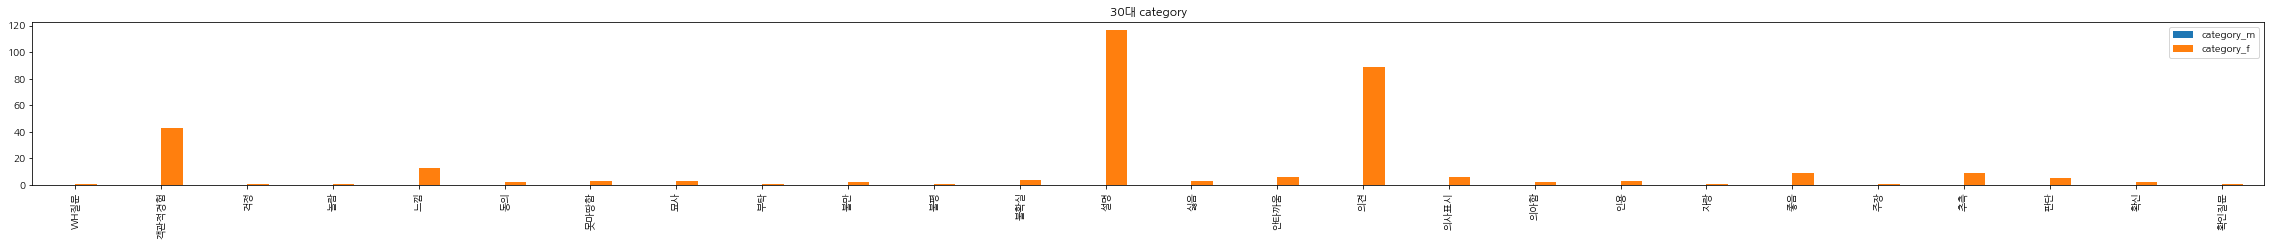

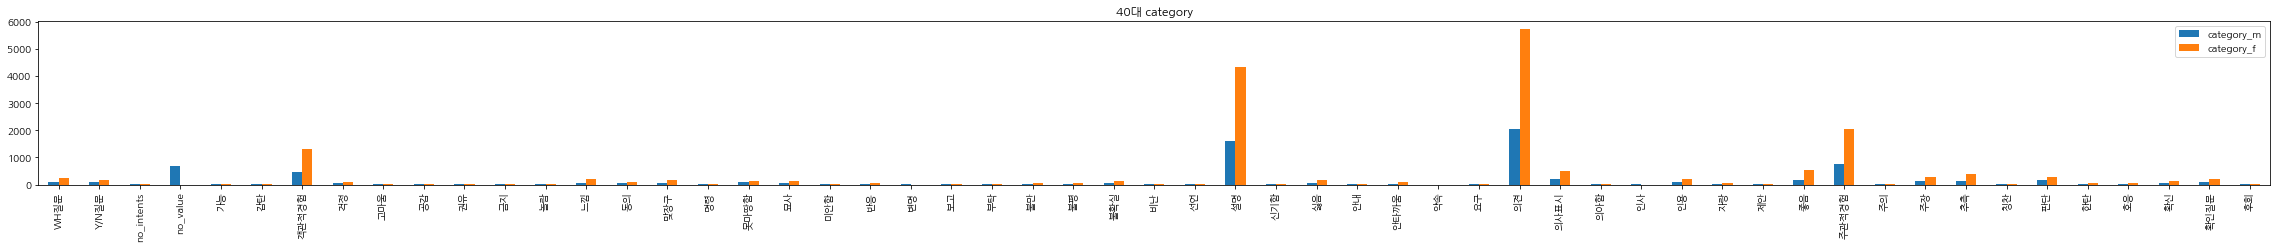

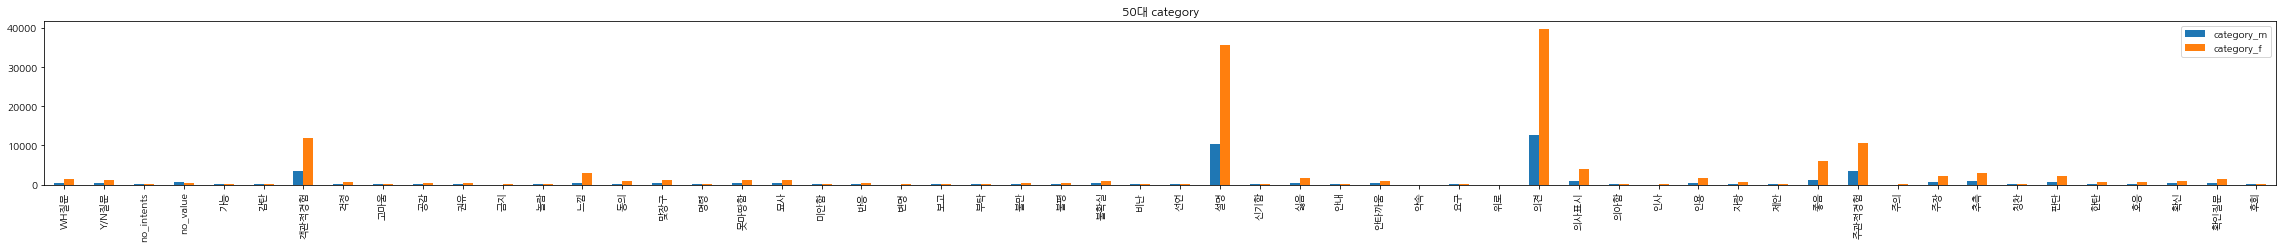

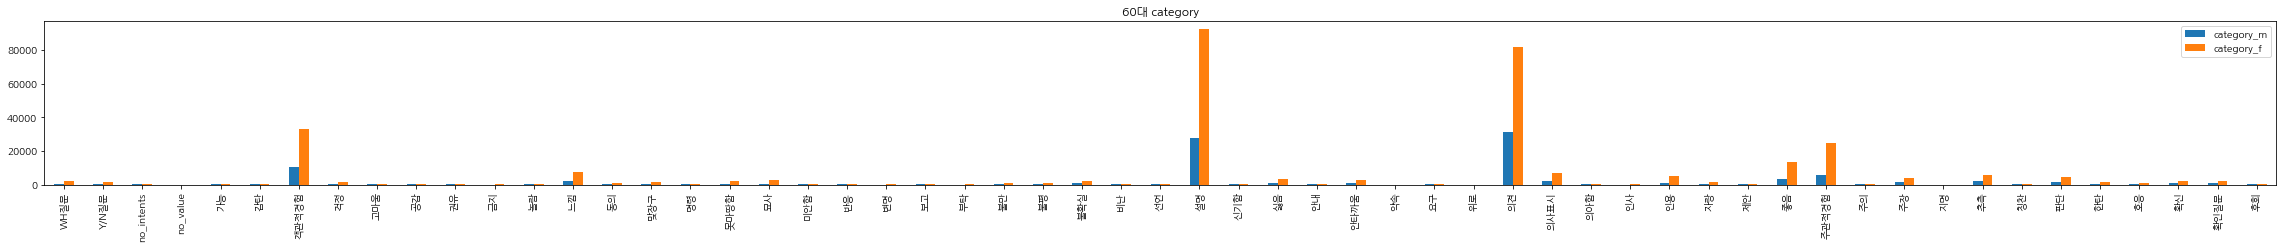

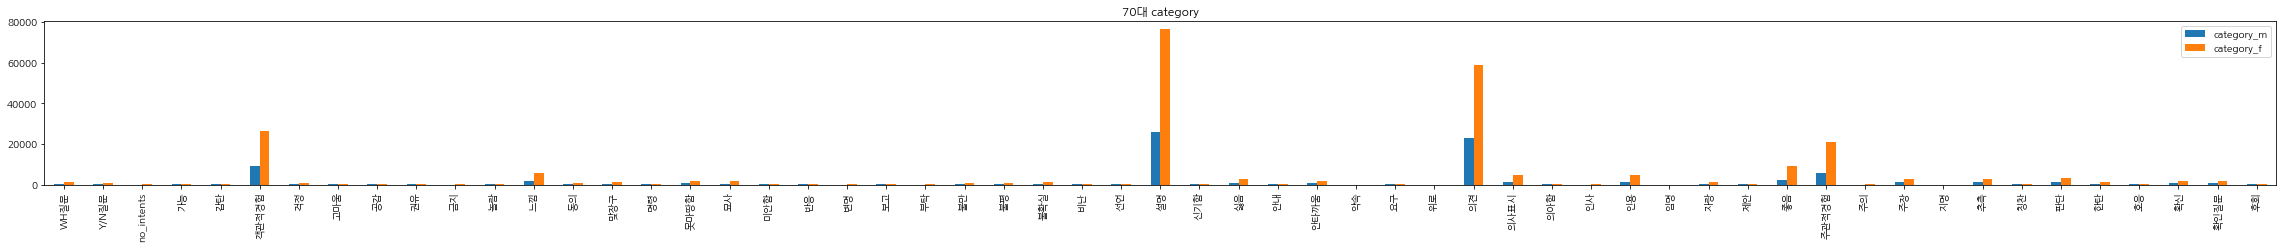

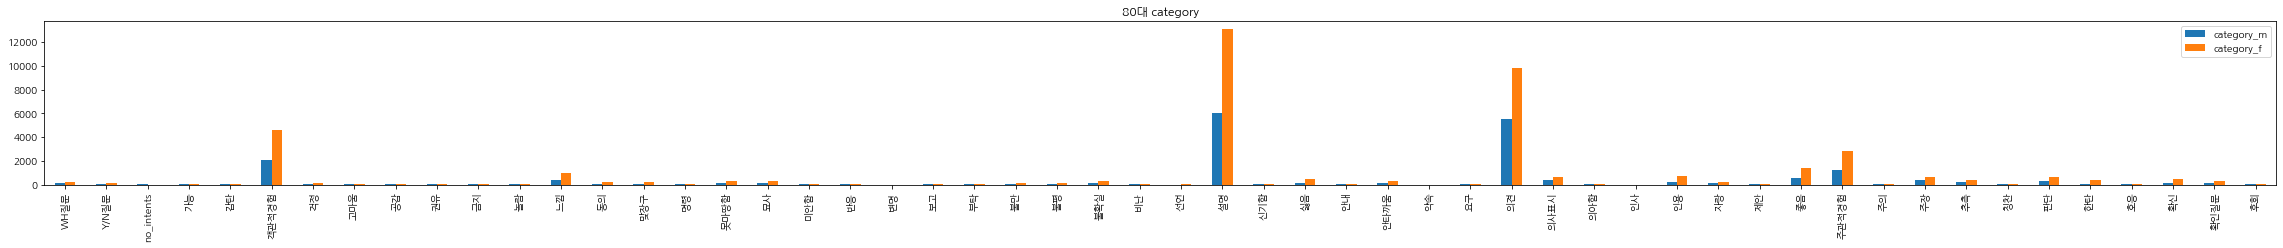

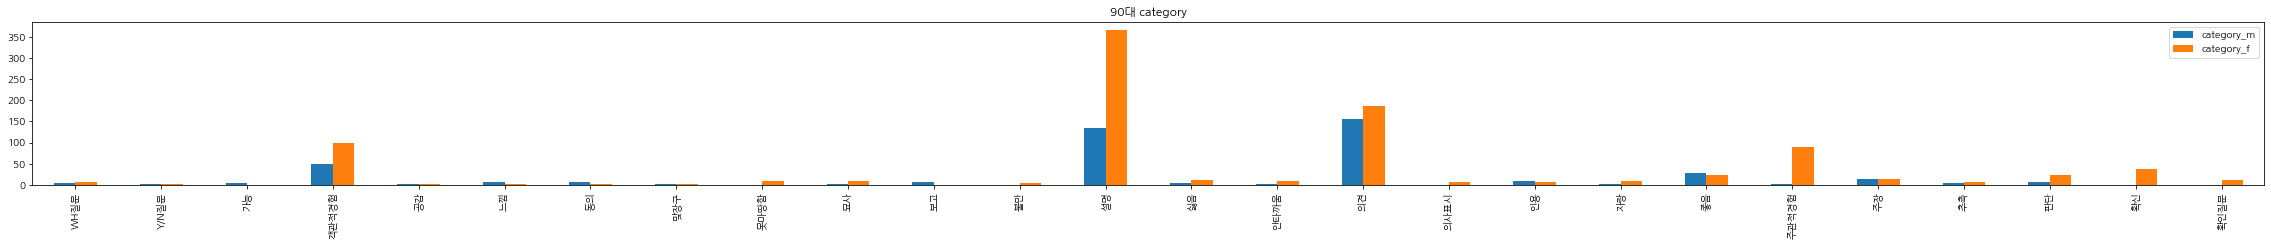

In [41]:
stat_30_category_df.plot(kind="bar", title="30대 category", figsize=(40,3))
stat_40_category_df.plot(kind="bar", title="40대 category", figsize=(40,3))
stat_50_category_df.plot(kind="bar", title="50대 category", figsize=(40,3))
stat_60_category_df.plot(kind="bar", title="60대 category", figsize=(40,3))
stat_70_category_df.plot(kind="bar", title="70대 category", figsize=(40,3))
stat_80_category_df.plot(kind="bar", title="80대 category", figsize=(40,3))
stat_90_category_df.plot(kind="bar", title="90대 category", figsize=(40,3))

In [42]:
stat_30_emotion_df

,emotion_m,emotion_f
irrelevant,NaN,248
negative,NaN,48
neutral,NaN,1
positive,NaN,32


In [43]:
stat_40_emotion_df

,emotion_m,emotion_f
irrelevant,6247,15006
negative,605,1331
neutral,159,196
no_emotions,5,4
positive,672,1806


In [44]:
stat_50_emotion_df

,emotion_m,emotion_f
irrelevant,34140,104772.0
irrevent,3,NaN
negative,3193,13264.0
neutral,521,2004.0
no_emotions,20,55.0
positive,4065,19706.0


In [45]:
stat_60_emotion_df

,emotion_m,emotion_f
irrelevant,77492,237994
negative,9017,30374
neutral,1055,3761
no_emotions,5,336
positive,12985,43132


In [46]:
stat_70_emotion_df

,emotion_m,emotion_f
irrelevant,64505,186322
negative,6942,24683
neutral,819,2794
positive,9284,30568


In [47]:
stat_80_emotion_df

,emotion_m,emotion_f
irrelevant,15274,31229
negative,1855,4294
neutral,158,397
positive,2048,4854


In [48]:
stat_90_emotion_df

,emotion_m,emotion_f
irrelevant,327,741
negative,40,135
positive,90,110


<AxesSubplot:title={'center':'90대 emotion'}>

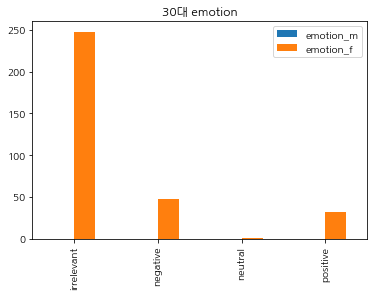

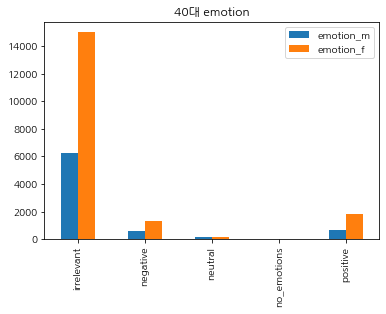

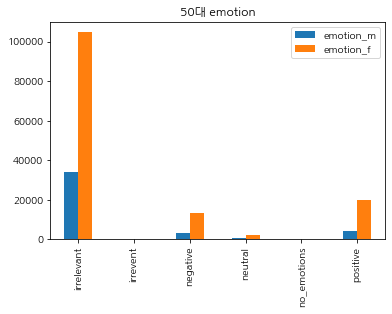

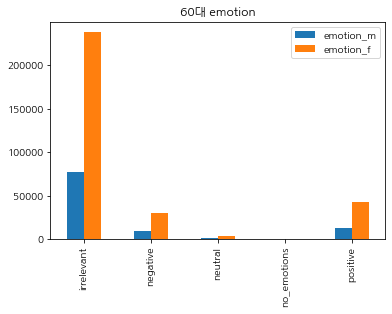

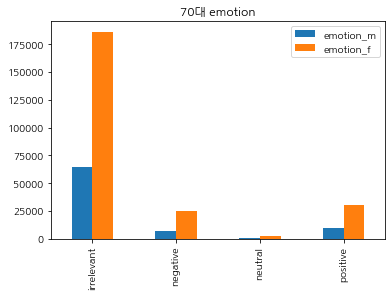

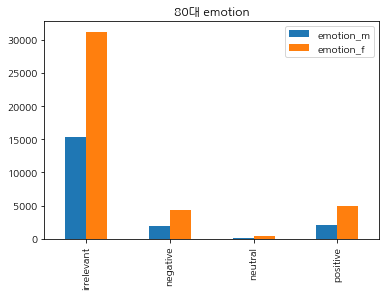

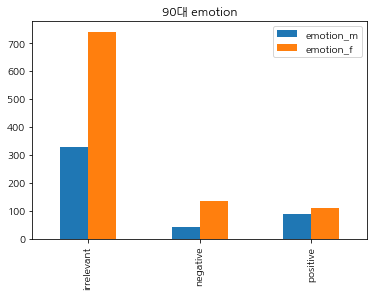

In [49]:
stat_30_emotion_df.plot(kind="bar", title="30대 emotion")
stat_40_emotion_df.plot(kind="bar", title="40대 emotion")
stat_50_emotion_df.plot(kind="bar", title="50대 emotion")
stat_60_emotion_df.plot(kind="bar", title="60대 emotion")
stat_70_emotion_df.plot(kind="bar", title="70대 emotion")
stat_80_emotion_df.plot(kind="bar", title="80대 emotion")
stat_90_emotion_df.plot(kind="bar", title="90대 emotion")

In [50]:
stat_30_grammar_df

,grammar_m,grammar_f
DEC,NaN,312
IMP,NaN,1
WHI,NaN,2
YNI,NaN,14


In [51]:
stat_40_grammar_df

,grammar_m,grammar_f
DEC,7166,17341
IMP,44,55
PRO,7,35
WHI,143,399
YNI,323,504
no_grammarTypes,5,9


In [52]:
stat_50_grammar_df

,grammar_m,grammar_f
DEC,39667,133207
IMP,131,486
PRO,67,215
WHI,775,2355
YNI,1274,3476
no_grammarTypes,28,62


In [53]:
stat_60_grammar_df

,grammar_m,grammar_f
DEC,96990,305319
IMP,272,914
PRO,126,318
WHI,1072,3477
YNI,2089,5248
no_grammarTypes,5,321


In [54]:
stat_70_grammar_df

,grammar_m,grammar_f
DEC,79178,236937
IMP,214,709
PRO,72,219
WHI,766,2802
YNI,1320,3700


In [55]:
stat_80_grammar_df

,grammar_m,grammar_f
DEC,18676,39453
IMP,55,117
PRO,27,23
WHI,209,509
YNI,368,672


In [56]:
stat_90_grammar_df

,grammar_m,grammar_f
DEC,444,978
WHI,6,10
YNI,7,12


<AxesSubplot:title={'center':'90대 grammar'}>

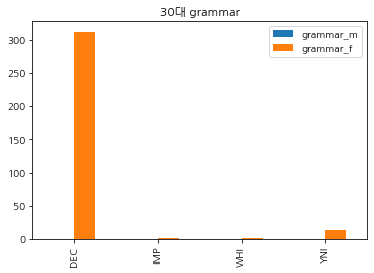

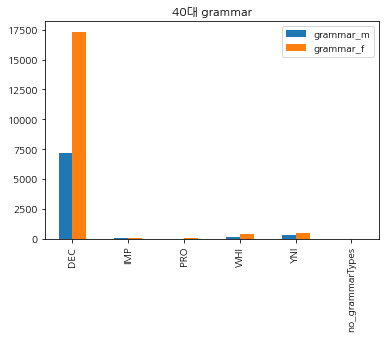

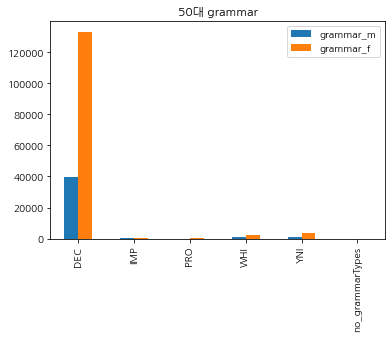

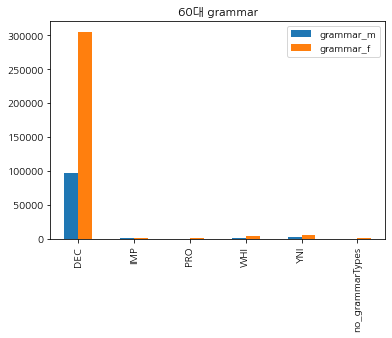

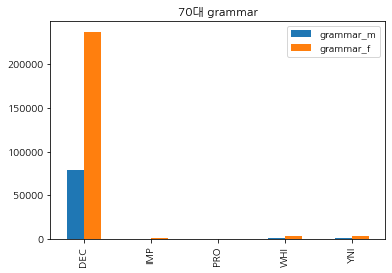

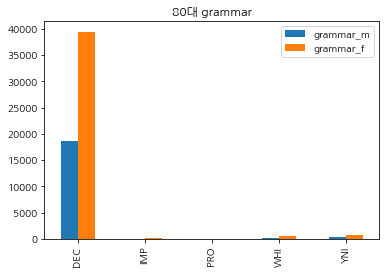

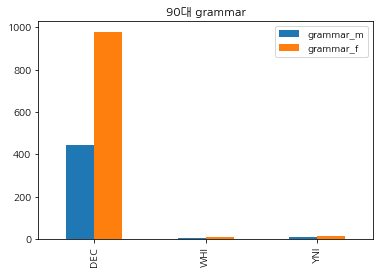

In [57]:
stat_30_grammar_df.plot(kind="bar", title="30대 grammar")
stat_40_grammar_df.plot(kind="bar", title="40대 grammar")
stat_50_grammar_df.plot(kind="bar", title="50대 grammar")
stat_60_grammar_df.plot(kind="bar", title="60대 grammar")
stat_70_grammar_df.plot(kind="bar", title="70대 grammar")
stat_80_grammar_df.plot(kind="bar", title="80대 grammar")
stat_90_grammar_df.plot(kind="bar", title="90대 grammar")

<AxesSubplot:title={'center':'50대 category'}>

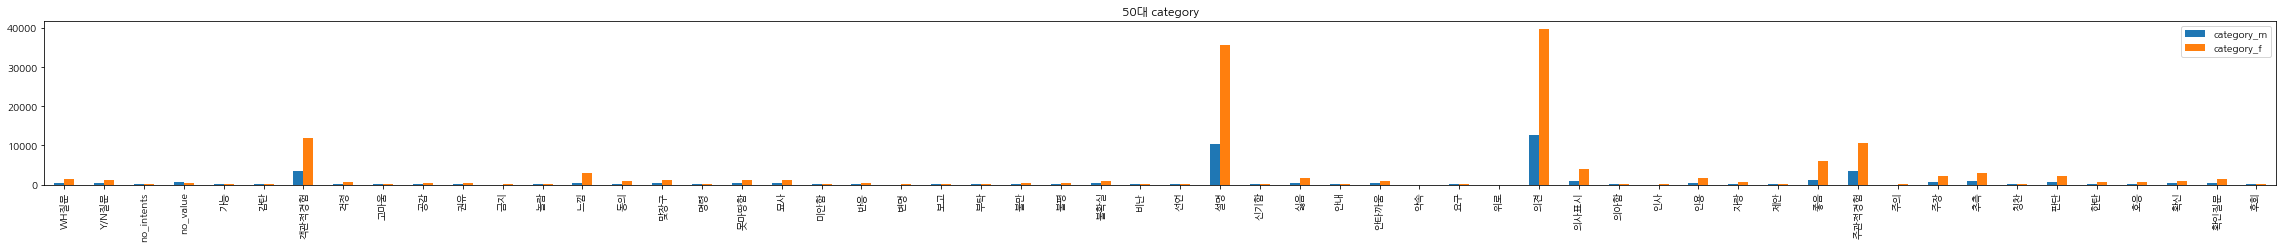

In [13]:
stat_50_category_df.plot(kind="bar", title="50대 category", figsize=(40,3))

In [14]:
stat_50_emotion_df

,emotion_m,emotion_f
irrelevant,34140,104772.0
irrevent,3,NaN
negative,3193,13264.0
neutral,521,2004.0
no_emotions,20,55.0
positive,4065,19706.0


<AxesSubplot:title={'center':'50대 emotion'}>

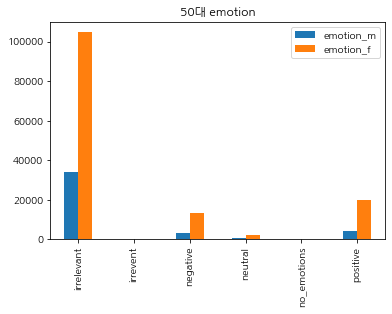

In [15]:
stat_50_emotion_df.plot(kind="bar", title="50대 emotion")

In [16]:
stat_50_grammar_df

,grammar_m,grammar_f
DEC,39667,133207
IMP,131,486
PRO,67,215
WHI,775,2355
YNI,1274,3476
no_grammarTypes,28,62


<AxesSubplot:title={'center':'50대 emotion'}>

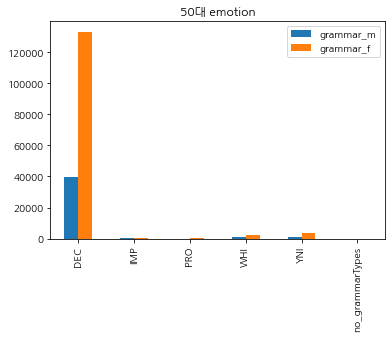

In [17]:
stat_50_grammar_df.plot(kind="bar", title="50대 emotion")

In [ ]:
(annot_50_df[annot_50_df["gender"] == "m"])["intent_type"].value_counts().plot(kind="bar", color='blue')

In [ ]:
(annot_50_df[annot_50_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

In [ ]:
(annot_50_df[annot_50_df["gender"] == "f"])["intent_type"].value_counts().plot(kind="bar", color='red')

In [ ]:
annot_20c_df = annot_df[annot_df["birth_year"] > 1900.0]

In [ ]:
annot_20c_df["birth_year"].describe()

In [ ]:
# 연령대 : 1052 - 1999
pd.set_option('display.max_rows', None)
annot_df["birth_year"].value_counts().sort_index()

# annot_20c_df["birth_year"].value_counts().sort_index()
# annot_20c_df["birth_year"].value_counts().sort_values()

In [ ]:
# hist = annot_20c_df["birth_year"].hist(bins=10)
hist_birth = annot_20c_df.hist(column='birth_year', bins=10)

# hist = annot_20c_df["birth_year"].plot(kind="hist")

In [ ]:
# 성별
annot_20c_df["gender"].value_counts()

In [ ]:
bar_gender = annot_20c_df["gender"].value_counts().plot(kind="bar")

In [ ]:
annot_20c_mail_50_df = annot_df[(annot_df["birth_year"] > 1900.0)  & (annot_df["gender"] == 'm')]
annot_20c_mail_50_df.head()

In [ ]:
annot_50_df["intent_type"].value_counts().sort_index()

In [ ]:
annot_50_df["intent_type"].value_counts().plot(kind="bar")

In [ ]:
(annot_50_df[annot_50_df["gender"] == "m"])["intent_type"].value_counts().plot(kind="bar")